In [123]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, mode
import datetime 
import datetime as dt

In [2]:
data_sessions = pd.read_csv('ready_sessions_data')
data_hits = pd.read_csv('ready_data_hits')

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1017433579.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sessions = pd.read_csv('ready_sessions_data')


In [5]:
data_sessions.pop('Unnamed: 0')
data_hits.pop('Unnamed: 0')

0                  0
1                  1
2                  2
3                  3
4                  4
              ...   
11012899    15726465
11012900    15726466
11012901    15726467
11012902    15726468
11012903    15726469
Name: Unnamed: 0, Length: 11012904, dtype: int64

In [6]:
data_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,1303431342277938317.1637250145.1637250145,303478758.163724,2021-11-18,18:42:25,3,bByPQxmDaMXgpHeypKSM,Sbol_catalog,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Balashikha
1,1509873377769628707.1640511648.1640511648,351544790.164044,2021-12-26,12:40:48,3,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow
2,1531322904005943789.1639041942.1639041942,356538897.163903,2021-12-09,12:25:42,3,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow
3,2204974488430283782.1640022724.1640022724,513385629.16389,2021-12-20,20:52:04,20,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,Apple,1536x864,Chrome,Russia,Moscow
4,2327199327706508246.1640966589.1640966589,541843317.163535,2021-12-31,19:03:09,8,bByPQxmDaMXgpHeypKSM,promo_sbol,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Realme,360x800,Chrome,Russia,Moscow


In [7]:
data_hits.head()

,session_id,hit_date,hit_time,hit_type,hit_page_path,event_category,event_action,day_of_week,month,year,auto_mark,purpose_action,len_link
0,5639623078712724064.1640254056.1640254056,2021-12-23,598,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,thursday,12,2021,other,0,544
1,7750352294969115059.1640271109.1640271109,2021-12-23,597,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,thursday,12,2021,other,0,176
2,885342191847998240.1640235807.1640235807,2021-12-23,796,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,thursday,12,2021,volkswagen,0,534
3,142526202120934167.1640211014.1640211014,2021-12-23,934,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,thursday,12,2021,other,0,544
4,3450086108837475701.1640265078.1640265078,2021-12-23,769,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,thursday,12,2021,mercedes-benz,0,78


## First dataframe data_hits

In [10]:
data_hits = data_hits.drop_duplicates()

In [26]:
#let's find the dependencies
#however, it is worth clarifying, the dataset contains user inputs and their actions, and each line is one action in the session
#it is worth considering a set of actions, and not each one individually, since the set of actions is performed by the user 
#Before you click on the cherished call or checkout button, it means you need to find a way to combine or collapse all actions under
#One session number and assign this data to one id_client

In [27]:
#it would be more correct to convert data_hits first

In [28]:
sessions = list(set(data_hits.session_id.tolist()))

In [29]:
len(sessions)

1734610

In [30]:
data_hits.hit_time.describe().apply(lambda x: f"{x:0.3f}")

count    9970969.000
mean         221.253
std          378.106
min            0.000
25%           52.000
50%          135.000
75%          240.000
max        13157.000
Name: hit_time, dtype: object

In [31]:
#let's see what time values are acceptable, if a person looks at the same picture on the site for several days, there is clearly something wrong with him :D
#just the tab is open and that's it, we don't care about open tabs, we'll find them and delete them

In [32]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5*iqr, q75 + 1.5*iqr)
    
    return boundaries

In [34]:
boundaries = calculate_outliers(data_hits.hit_time)

In [35]:
outs = (data_hits.hit_time < boundaries[0]) | (data_hits.hit_time > boundaries[1])
outs.sum()/len(data_hits)

0.07569525088283796

In [37]:
data_hits[outs][data_hits[outs]['event_category'].isin(['quiz'])]
#I understand what's going on now, people filled out a search query in order to find the certain car, 
#and this is longer in time (this is about the quiz)

,session_id,hit_date,hit_time,hit_type,hit_page_path,event_category,event_action,day_of_week,month,year,auto_mark,purpose_action,len_link
0,5639623078712724064.1640254056.1640254056,2021-12-23,598,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,thursday,12,2021,other,0,544
1,7750352294969115059.1640271109.1640271109,2021-12-23,597,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,thursday,12,2021,other,0,176
2,885342191847998240.1640235807.1640235807,2021-12-23,796,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,thursday,12,2021,volkswagen,0,534
3,142526202120934167.1640211014.1640211014,2021-12-23,934,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,thursday,12,2021,other,0,544
4,3450086108837475701.1640265078.1640265078,2021-12-23,769,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,thursday,12,2021,mercedes-benz,0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012899,6866159858916559617.1640270865.1640270865,2021-12-23,811,event,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,thursday,12,2021,toyota,0,534
11012900,7310304587364460692.1640261783.1640261783,2021-12-23,905,event,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,thursday,12,2021,mercedes-benz,0,543
11012901,8013702685784312179.1640270195.1640270195,2021-12-23,2173,event,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,thursday,12,2021,toyota,0,214
11012902,8021505554734405918.1640257821.1640257821,2021-12-23,713,event,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,thursday,12,2021,bmw,0,60


In [38]:
data_hits_new = data_hits[data_hits['hit_time'] < 7200]

In [40]:
agg_func_describe = {'hit_time': ['mean'], 'purpose_action': ['max'], 'len_link':['mean'],'session_id':['count'], 'auto_mark':[pd.Series.mode] }
data_hits_new_groupes = data_hits_new.groupby(['session_id']).agg(agg_func_describe)

In [41]:
data_hits_new_groupes = data_hits_new_groupes.reset_index()
data_hits_new_groupes

,session_id,hit_time,purpose_action,len_link,session_id,auto_mark
,,mean,max,mean,count,mode
0,1000009318903347362.1632663668.1632663668,161.666667,0,116.500000,6,other
1,1000010177899156286.1635013443.1635013443,164.166667,0,54.000000,6,other
2,1000013386240115915.1635402956.1635402956,98.571429,0,106.000000,7,other
3,1000017303238376207.1623489300.1623489300,245.500000,0,57.250000,8,other
4,1000020580299877109.1624943350.1624943350,634.000000,0,75.000000,1,other
...,...,...,...,...,...,...
1734605,999960188766601545.1626816843.1626816843,52.000000,0,22.000000,1,other
1734606,99996598443387715.1626811203.1626811203,83.500000,0,22.000000,2,other
1734607,999966717128502952.1638428330.1638428330,75.583333,0,180.333333,12,other


In [47]:
data_hits_reduced = data_hits_new.drop_duplicates(subset=('session_id'))

In [48]:
data_hits_reduced['hit_time']= data_hits_new_groupes['hit_time']['mean'].tolist()
data_hits_reduced['purpose_action']=data_hits_new_groupes['purpose_action']['max'].tolist()
data_hits_reduced['num_actions']=data_hits_new_groupes['session_id']['count'].tolist()
data_hits_reduced['auto_mark_top']=data_hits_new_groupes['auto_mark']['mode'].tolist()
data_hits_reduced['auto_mark']=data_hits_new_groupes['auto_mark']['mode'].tolist()
data_hits_reduced['len_link_mean']=data_hits_new_groupes['len_link']['mean'].tolist()

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1662202406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hits_reduced['hit_time']= data_hits_new_groupes['hit_time']['mean'].tolist()
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1662202406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hits_reduced['purpose_action']=data_hits_new_groupes['purpose_action']['max'].tolist()
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1662202406.py:3: 

In [96]:
auto_marks = data_hits_reduced['auto_mark'].tolist()
for index, item in enumerate(auto_marks):
    if len(auto_marks[index][0]) > 1:
        auto_marks[index] = auto_marks[index][0]
data_hits_reduced['auto_mark'] = auto_marks

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/573353265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hits_reduced['auto_mark'] = auto_marks


In [97]:
shuffled_df = data_hits_reduced.sample(frac=1,random_state=4)

purpose_df = shuffled_df.loc[shuffled_df['purpose_action'] == 1]

non_purpose_df = shuffled_df.loc[shuffled_df['purpose_action'] == 0].sample(n=len(purpose_df),random_state=42)

normalized_df = pd.concat([purpose_df, non_purpose_df])

In [98]:
normalized_df

,session_id,hit_date,hit_time,hit_type,hit_page_path,event_category,event_action,day_of_week,month,year,auto_mark,purpose_action,len_link,num_actions,auto_mark_top,len_link_mean
400041,524122359782156684.1639834856.1639834856,2021-12-18,270.272727,event,sberauto.com/cars/all/renault/logan/8c3c73f2?u...,card_web,view_card,saturday,12,2021,other,1,532,11,other,127.545455
9592887,7559572042402425640.1640101423.1640101423,2021-12-21,668.400000,event,podpiska.sberauto.com/,sub_page_view,sub_landing,tuesday,12,2021,other,1,22,50,other,50.860000
7042830,2869307329552400189.1634025282.1634025282,2021-10-12,83.500000,event,sberauto.com/cars?city=1&city=18&rental_car=re...,search_form,search_form_mark_select,tuesday,10,2021,other,1,109,2,other,22.000000
458847,6975577273223960628.1640847412.1640847412,2021-12-30,174.923077,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,thursday,12,2021,other,1,171,13,other,44.846154
7021127,2455283537460458380.1630663565.1630663565,2021-09-03,76.666667,event,sberauto.com/cars?utm_source_initial=telegram&...,search_form,search_form_region,friday,9,2021,mercedes-benz,1,184,9,mercedes-benz,121.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680913,8225335893619898121.1635629767.1635629767,2021-10-31,52.000000,event,podpiska.sberauto.com/,sub_page_view,sub_landing,sunday,10,2021,other,0,22,1,other,22.000000
303065,5671776758666904674.1638417506.1638417506,2021-12-02,46.666667,event,podpiska.sberauto.com/,sub_page_view,sub_landing,thursday,12,2021,other,0,22,3,other,22.000000
4893917,6073222150593326438.1622976189.1622976189,2021-06-06,52.000000,event,podpiska.sberauto.com/,sub_page_view,sub_landing,sunday,6,2021,other,0,22,1,other,22.000000
50299,6947822378508620229.1636045253.1636045253,2021-11-04,83.500000,event,podpiska.sberauto.com/,sub_page_view,sub_landing,thursday,11,2021,other,0,22,2,other,22.000000


In [99]:
hits_new_balanced= normalized_df

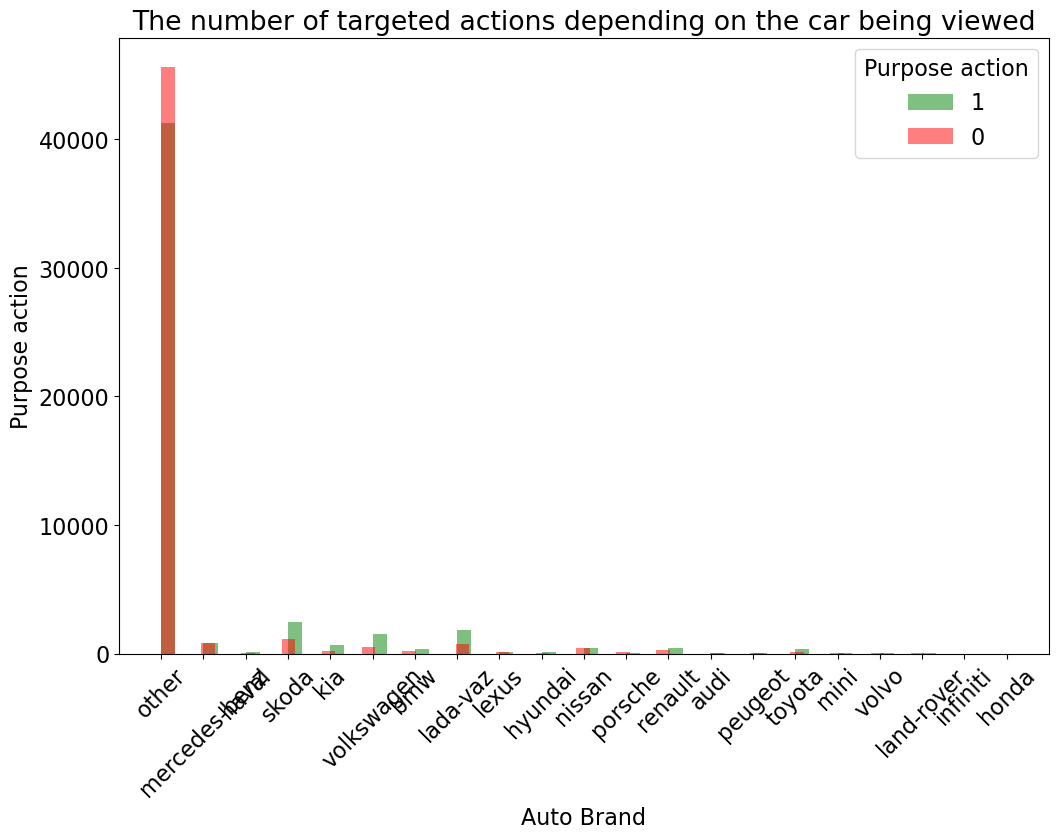

In [109]:
colors = {1:'green', 0:'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for purposes in colors:
    color = colors[purposes]
    data = hits_new_balanced[hits_new_balanced['purpose_action'] == int(purposes)]

    ax.hist(data['auto_mark'], bins=60, color=color, alpha= 0.5)

plt.xlabel('Auto Brand')
plt.ylabel('Purpose action')
plt.xticks(rotation = 45)
plt.title('The number of targeted actions depending on the car being viewed')
plt.legend(colors, title='Purpose action')
#if the user is viewing a skoda or lada-vaz, then most likely he will subscribe and so on

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2983442197.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['len_link_mean'].dropna(),
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2983442197.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['len_link_mean'].dropna(),


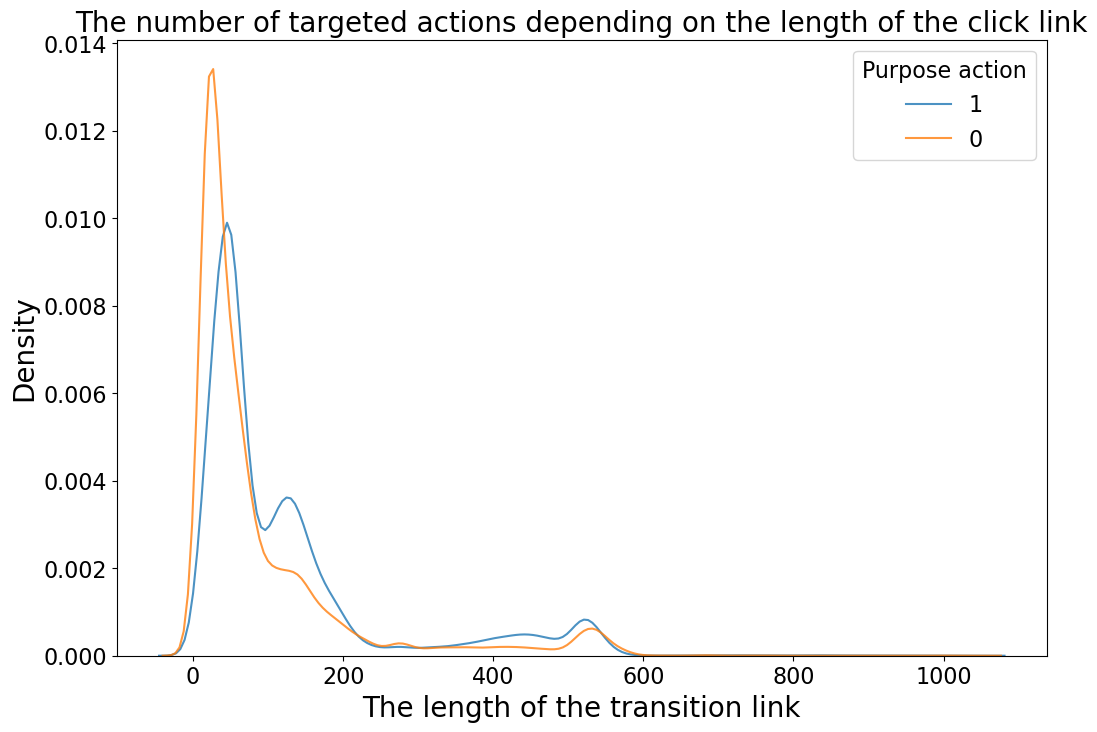

In [107]:
types = ['1','0']

fig, ax = plt.subplots(figsize=(12, 8))

for b_type in types:
    subset = hits_new_balanced[hits_new_balanced['purpose_action'] == int(b_type)]
    sns.kdeplot(subset['len_link_mean'].dropna(),
            label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('The length of the transition link', size = 20); plt.ylabel('Density', size = 20); 
plt.title('The number of targeted actions depending on the length of the click link', size = 20);
plt.legend(types, title='Purpose action')
#there is a relationship between the activity of users on the site and the length of the click-through link

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1407645857.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['hit_time'].dropna(),
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1407645857.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['hit_time'].dropna(),


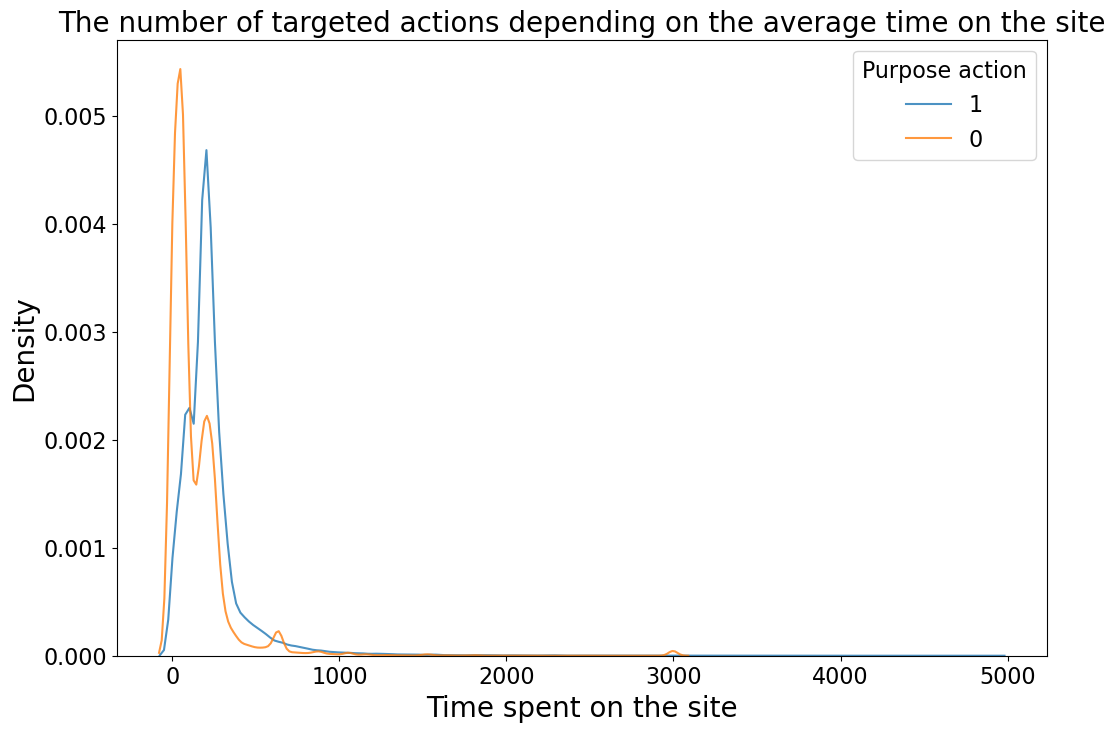

In [112]:
types = ['1','0']

fig, ax = plt.subplots(figsize=(12, 8))

for b_type in types:
    subset = hits_new_balanced[hits_new_balanced['purpose_action'] == int(b_type)]
    sns.kdeplot(subset['hit_time'].dropna(),
            label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('Time spent on the site', size = 20); plt.ylabel('Density', size = 20); 
plt.title('The number of targeted actions depending on the average time on the site', size = 20);
plt.legend(types, title='Purpose action')

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/3272781547.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['num_actions'].dropna(),
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/3272781547.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['num_actions'].dropna(),


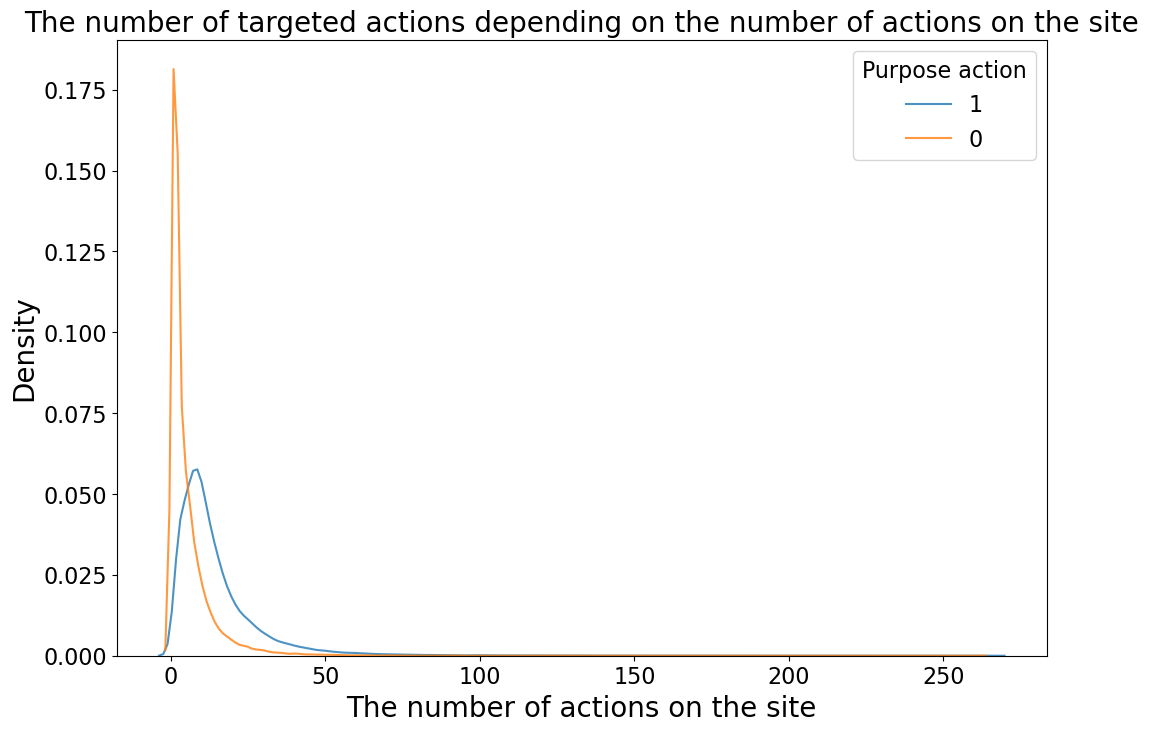

In [113]:
types = ['1','0']

fig, ax = plt.subplots(figsize=(12, 8))

for b_type in types:
    subset = hits_new_balanced[hits_new_balanced['purpose_action'] == int(b_type)]
    sns.kdeplot(subset['num_actions'].dropna(),
            label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('The number of actions on the site', size = 20); plt.ylabel('Density', size = 20); 
plt.title('The number of targeted actions depending on the number of actions on the site', size = 20);
plt.legend(types, title='Purpose action')

## The second dataframe data_sessions

In [115]:
data_sessions
# apparently not all sessions are represented in data_hits

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,1303431342277938317.1637250145.1637250145,303478758.163724,2021-11-18,18:42:25,3,bByPQxmDaMXgpHeypKSM,Sbol_catalog,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Balashikha
1,1509873377769628707.1640511648.1640511648,351544790.164044,2021-12-26,12:40:48,3,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow
2,1531322904005943789.1639041942.1639041942,356538897.163903,2021-12-09,12:25:42,3,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow
3,2204974488430283782.1640022724.1640022724,513385629.16389,2021-12-20,20:52:04,20,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,Apple,1536x864,Chrome,Russia,Moscow
4,2327199327706508246.1640966589.1640966589,541843317.163535,2021-12-31,19:03:09,8,bByPQxmDaMXgpHeypKSM,promo_sbol,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Realme,360x800,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108533,9055401700113249881.1639446112.1639446112,2108375006.163945,2021-12-14,04:41:52,1,ZpYIoDJMcFzVoPFsHGJL,banner,TmThBvoCcwkCZZUWACYq,JNHcPlZPxEMWDnRiyoBf,mobile,Android,ZTE,360x640,Chrome,Russia,Blagoveshchensk
2108534,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,other,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,Apple,1920x1080,Chrome,Russia,Moscow
2108535,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Moscow
2108536,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk


In [117]:
len(data_sessions.session_id), len(data_hits.session_id)

(2108538, 9970969)

In [118]:
sessions = list(set(data_hits.session_id.tolist()))

In [120]:
known_sessions_data = data_sessions[data_sessions['session_id'].isin(sessions)]

In [121]:
train_data = known_sessions_data.merge(data_hits, on=["session_id"])

In [122]:
train_data2 = train_data[['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country',
       'geo_city', 'purpose_action']]
train_data = train_data2.drop_duplicates()

## Cohort analysis

In [ ]:
datetime.date.today()

In [153]:
train_data['visit_date'][0]

datetime.date(2021, 11, 18)

In [156]:
def get_month(x):
    return (x.month)
train_data['month']=train_data['visit_date'].apply(get_month)

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1499381152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['month']=train_data['visit_date'].apply(get_month)


In [157]:
train_data

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,purpose_action,month
0,1303431342277938317.1637250145.1637250145,303478758.163724,2021-11-18,18:42:25,3,bByPQxmDaMXgpHeypKSM,Sbol_catalog,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Balashikha,0,11
1,1509873377769628707.1640511648.1640511648,351544790.164044,2021-12-26,12:40:48,3,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow,0,12
2,1531322904005943789.1639041942.1639041942,356538897.163903,2021-12-09,12:25:42,3,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow,0,12
3,2204974488430283782.1640022724.1640022724,513385629.16389,2021-12-20,20:52:04,20,bByPQxmDaMXgpHeypKSM,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,Apple,1536x864,Chrome,Russia,Moscow,0,12
4,2327199327706508246.1640966589.1640966589,541843317.163535,2021-12-31,19:03:09,8,bByPQxmDaMXgpHeypKSM,promo_sbol,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Realme,360x800,Chrome,Russia,Moscow,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11228272,9055394342833425189.1638599463.1638599463,2108373293.16386,2021-12-04,09:31:03,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Samsung,384x854,Chrome,Russia,Birsk,0,12
11228291,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,other,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,Apple,1920x1080,Chrome,Russia,Moscow,0,12
11228293,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,375x667,Safari,Russia,Moscow,0,11
11228322,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0,11


In [158]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [159]:
buy_data = train_data[train_data['purpose_action'].isin([1])]

In [160]:
buy_data['month_year'] = buy_data['visit_date'].apply(get_month)
buy_data['cohortMonth'] = buy_data.groupby('client_id')['month_year'].transform('min')

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1897354339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_data['month_year'] = buy_data['visit_date'].apply(get_month)
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1897354339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_data['cohortMonth'] = buy_data.groupby('client_id')['month_year'].transform('min')


In [161]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [162]:
buy_data['visit_date'] = pd.to_datetime(buy_data['visit_date'], errors='coerce')

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/3879414965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_data['visit_date'] = pd.to_datetime(buy_data['visit_date'], errors='coerce')


In [163]:
date_year, date_month, _ = get_date(buy_data, 'visit_date')
cohort_year, cohort_month, _ = get_date(buy_data, 'cohortMonth')
year_diff= date_year - cohort_year
month_diff = date_month - cohort_month
buy_data['cohort_index']=year_diff*12 +month_diff +1

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/1107898476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_data['cohort_index']=year_diff*12 +month_diff +1


In [164]:
buy_data1 = buy_data.pivot_table(index ='cohortMonth',
                                columns = 'cohort_index',
                                values='client_id',
                                aggfunc=len)

In [165]:
buy_data1

cohort_index,1,2,3,4,5,6,7,8
cohortMonth,,,,,,,,
2021-05-01,8824.0,695.0,156.0,100.0,36.0,8.0,3.0,3.0
2021-06-01,7679.0,200.0,65.0,26.0,5.0,5.0,6.0,NaN
2021-07-01,5846.0,163.0,53.0,21.0,9.0,13.0,NaN,NaN
2021-08-01,6516.0,201.0,86.0,106.0,75.0,NaN,NaN,NaN
2021-09-01,7076.0,174.0,45.0,22.0,NaN,NaN,NaN,NaN
2021-10-01,7664.0,134.0,47.0,NaN,NaN,NaN,NaN,NaN
2021-11-01,6142.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-01,7028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
first_column = buy_data1.iloc[:,0]
retention= buy_data1.div(first_column, axis=0)

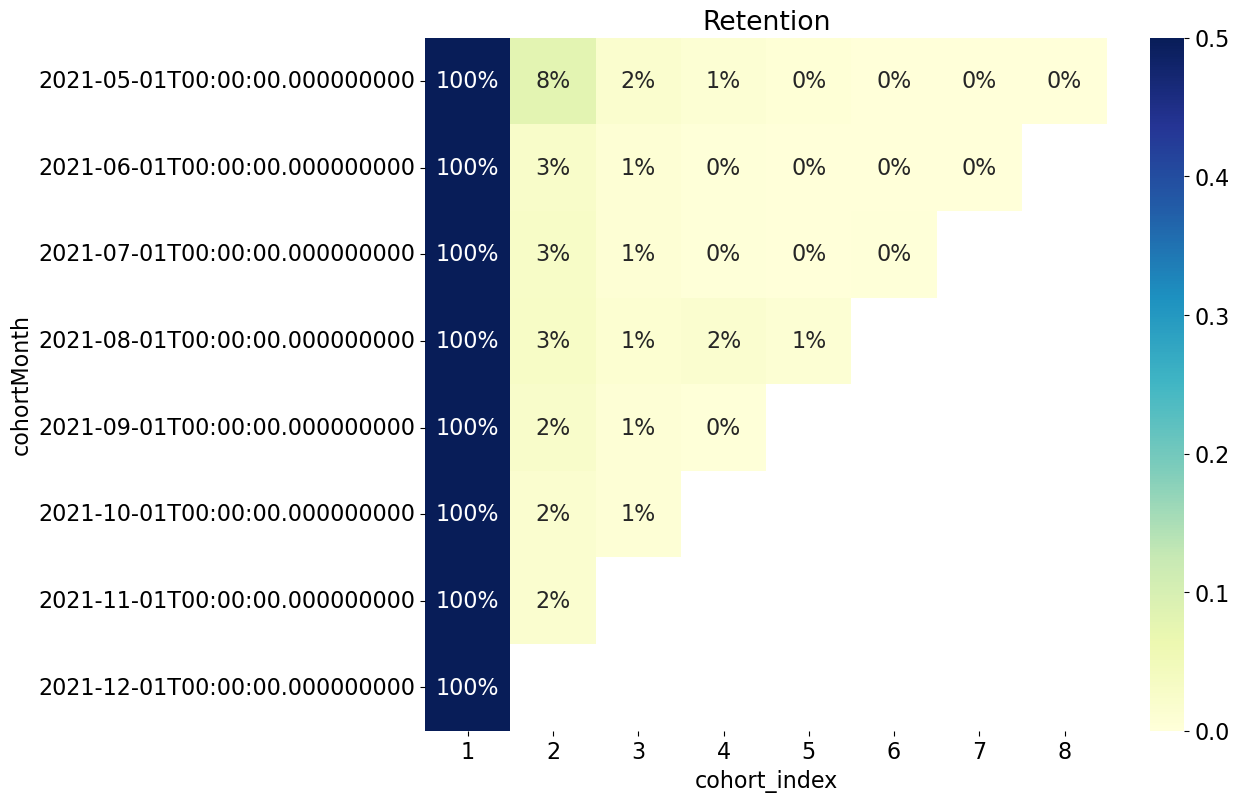

In [167]:
plt.figure(figsize=(11,9))
plt.title('Retention')
sns.heatmap(data = retention,
           annot = True, 
           fmt='.0%',
           vmin= 0,
           vmax= 0.5,
           cmap='YlGnBu')
plt.show()
#users who come in the first month do a lot of targeted actions, but in the following months they 
#do much less targeted actions. let's identify the IDs of users who performed many targeted actions
#in their first month and compare links and other information in other months

In [168]:
months = [5, 6, 7, 8, 9, 10, 11, 12]
features_important=['utm_source', 'utm_campaign', 'utm_adcontent', 'device_screen_resolution', 'device_brand' , 'geo_city',
                   'geo_country']
##we want to leave a few dozen of the most frequent signs, replace the rest with 'other'

In [169]:
features= [
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'geo_city',
       'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country']
#the features that we submit to the input of the model

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_important_data[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_important_data[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_important_data[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_imp_old[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_important_data[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_imp_old[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_important_data[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_imp_old[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_important_data[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_imp_old[features_important[l]]='other'
/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_11050/2298601796.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

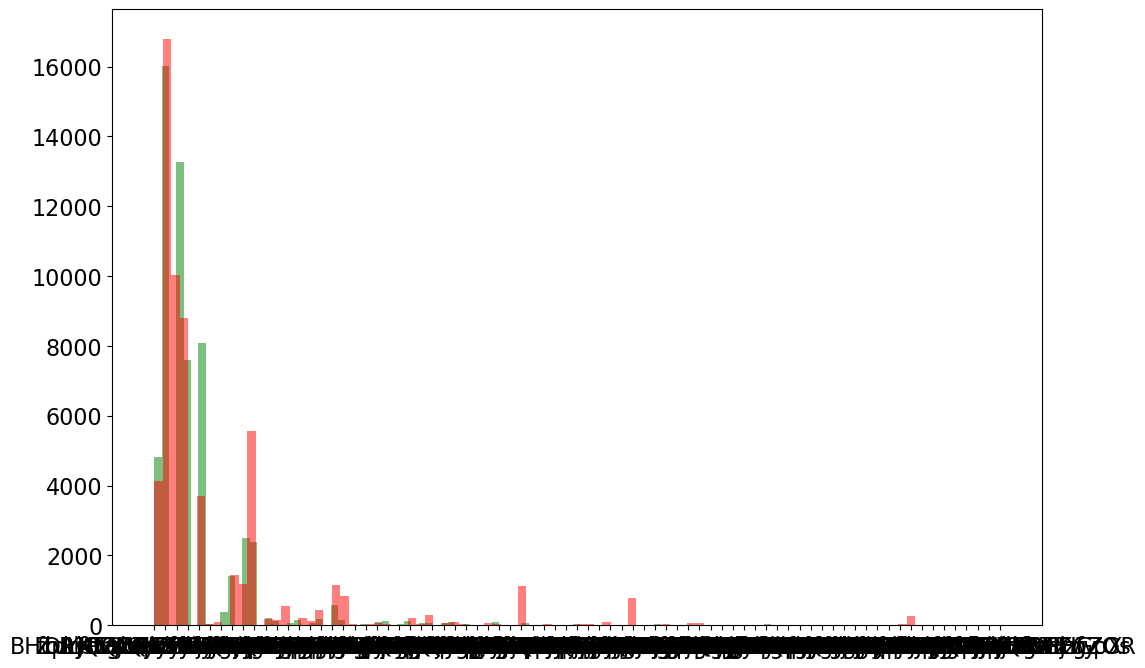

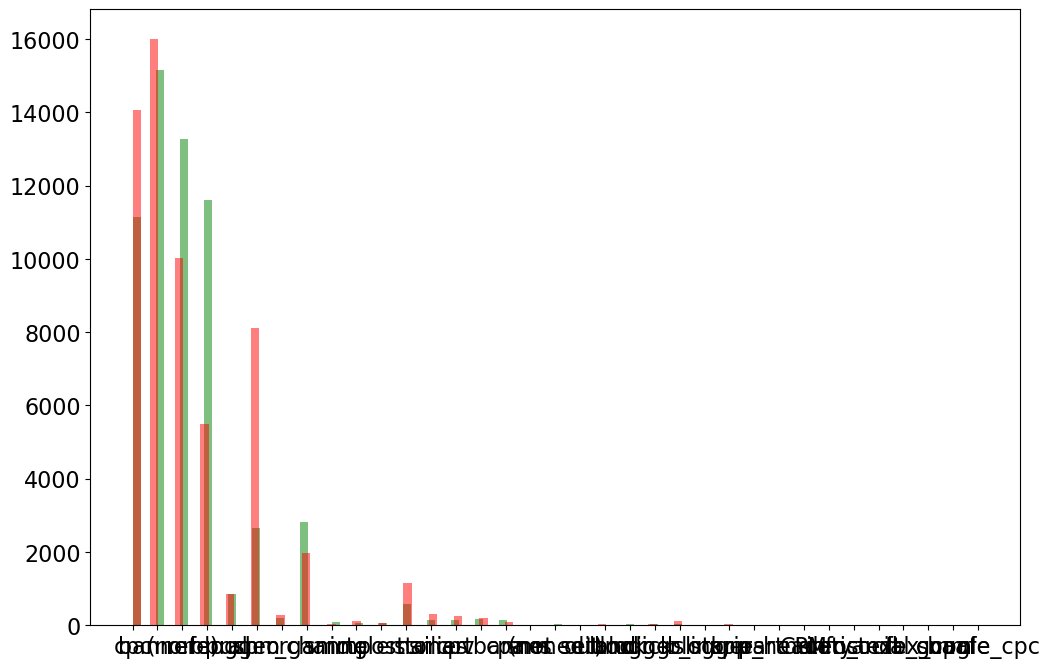

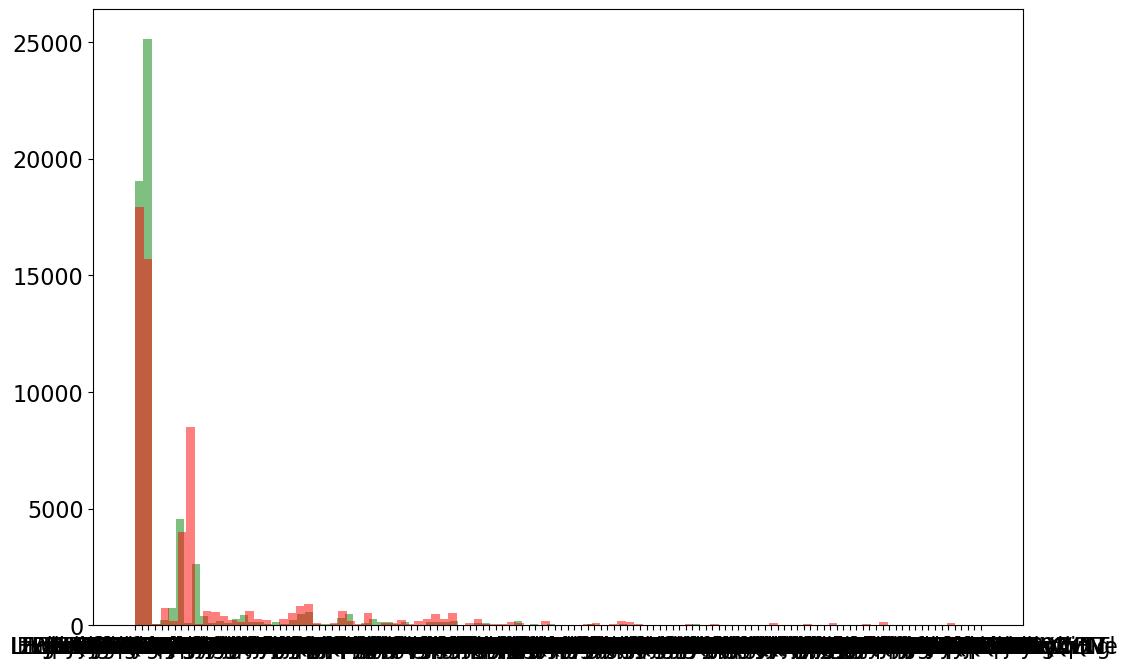

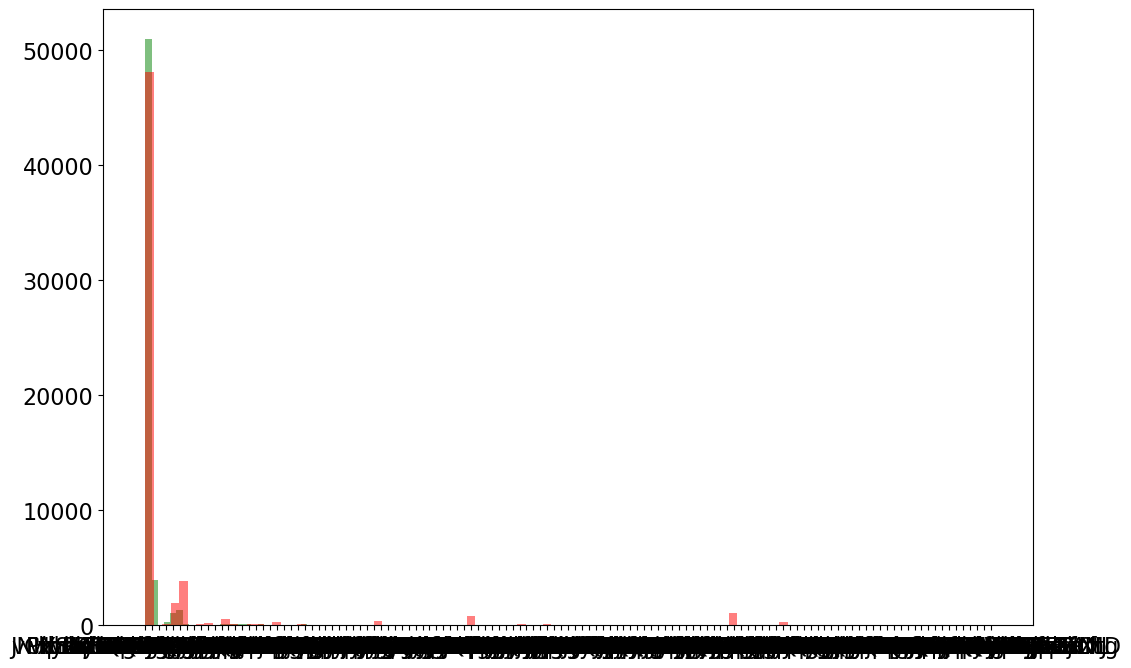

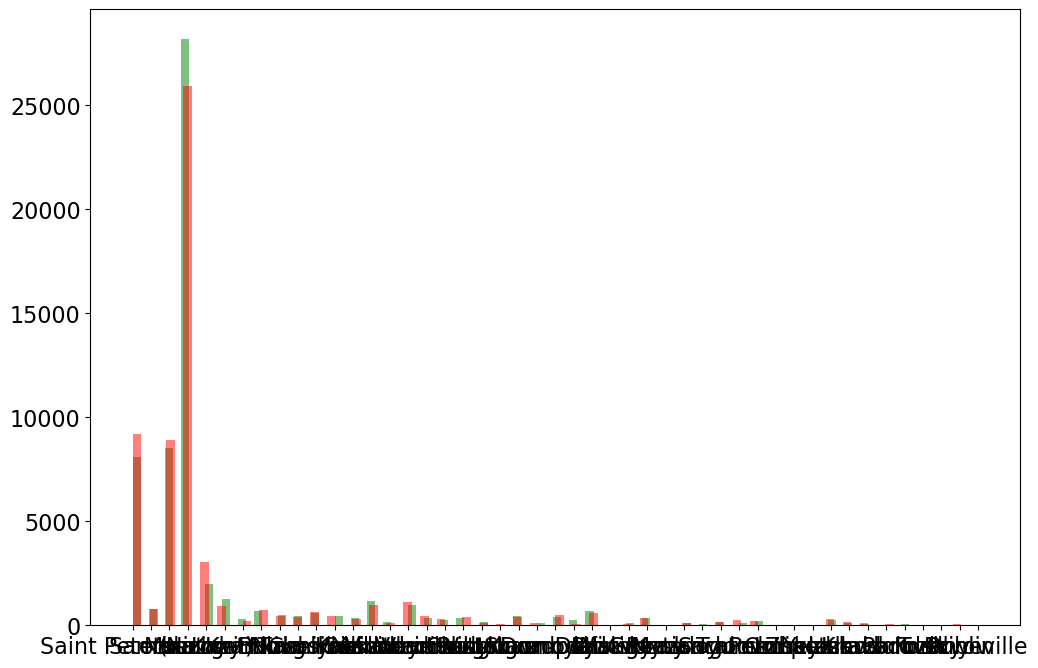

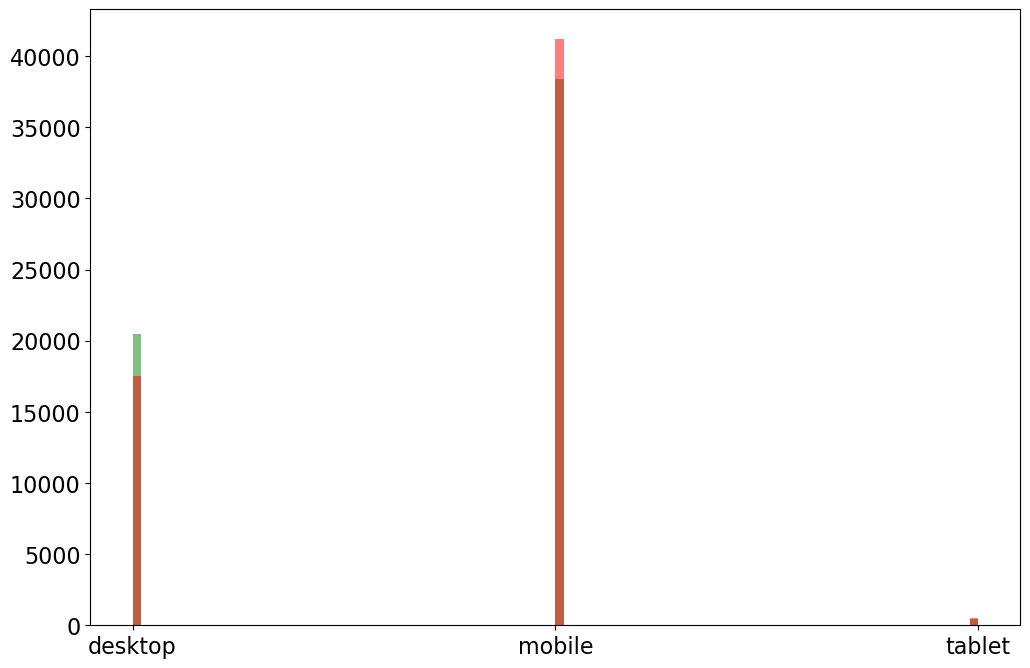

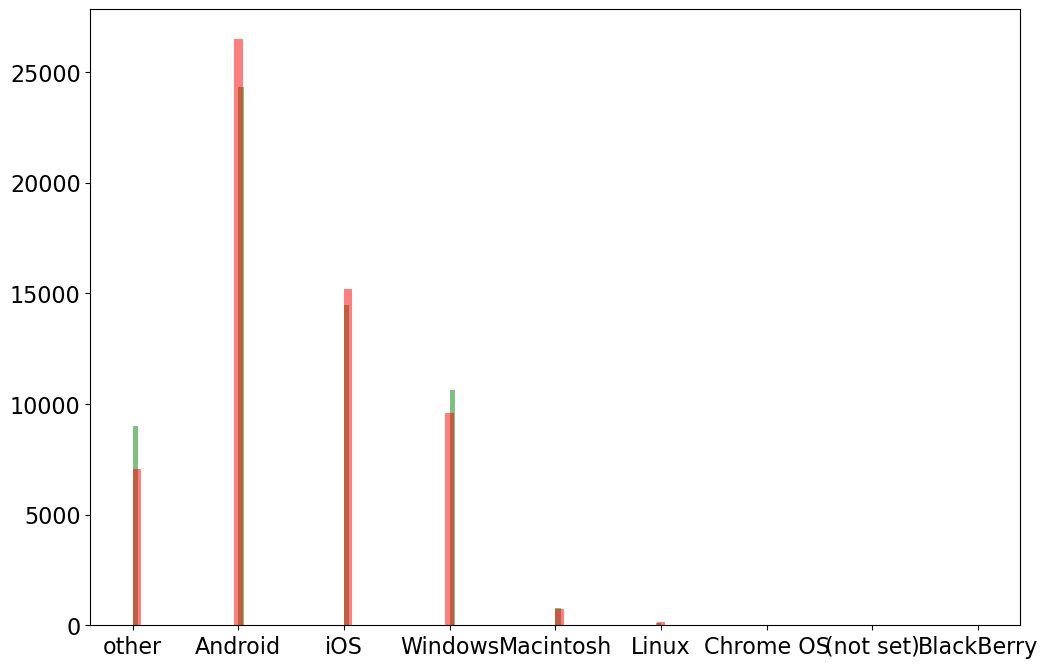

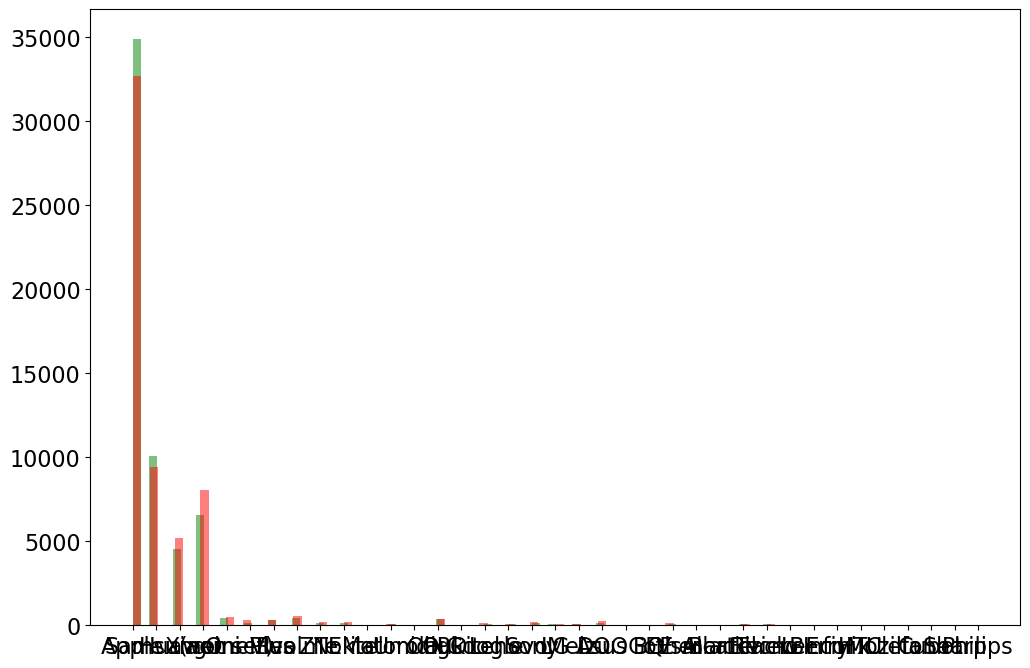

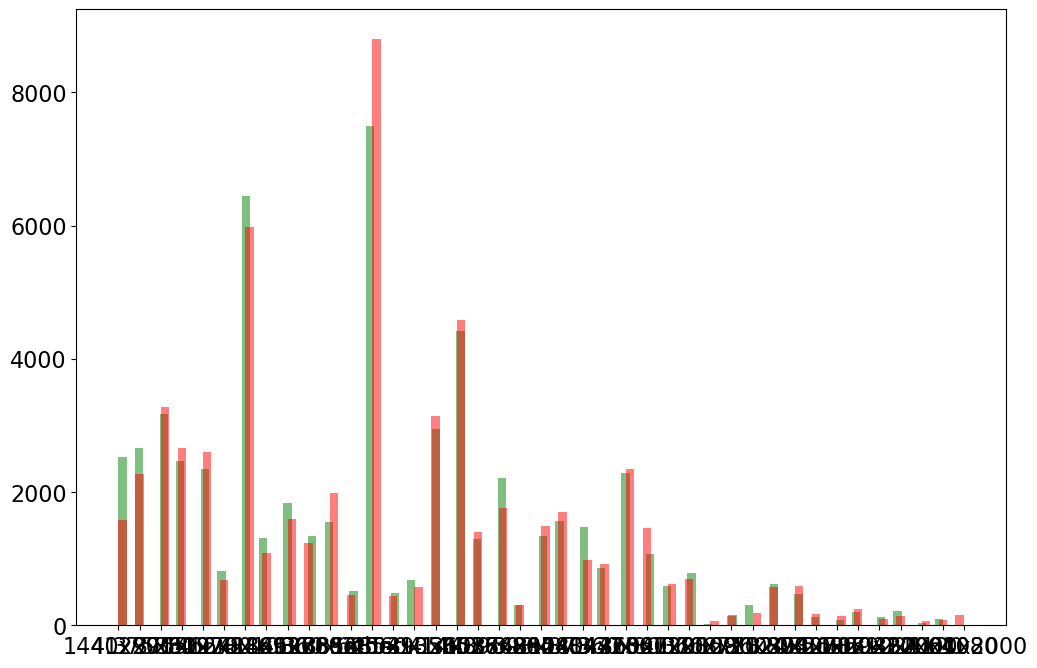

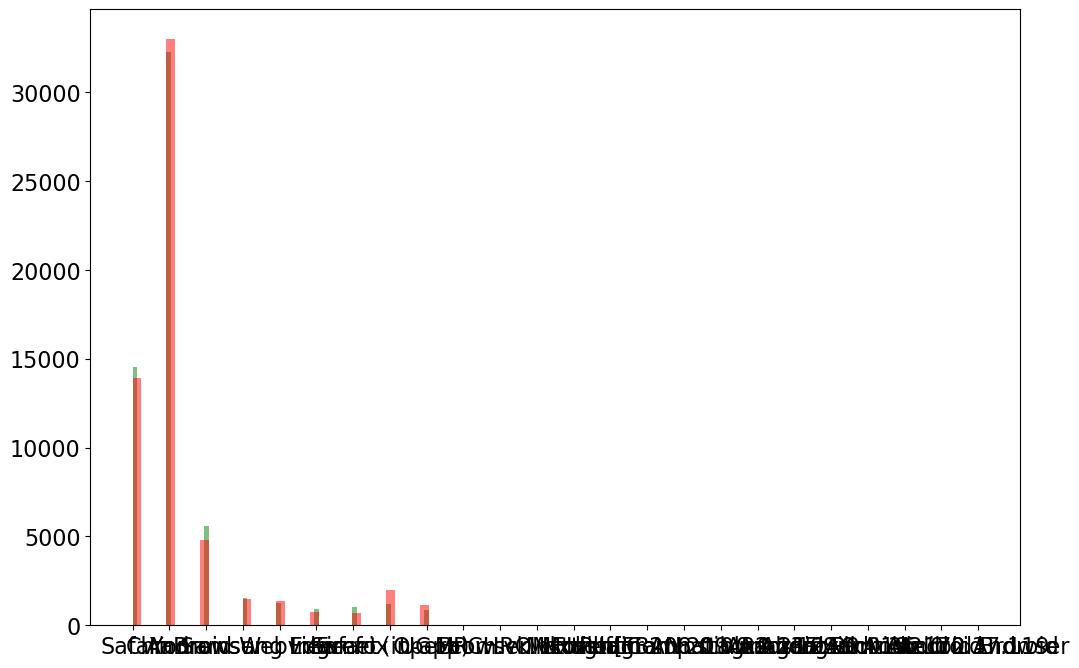

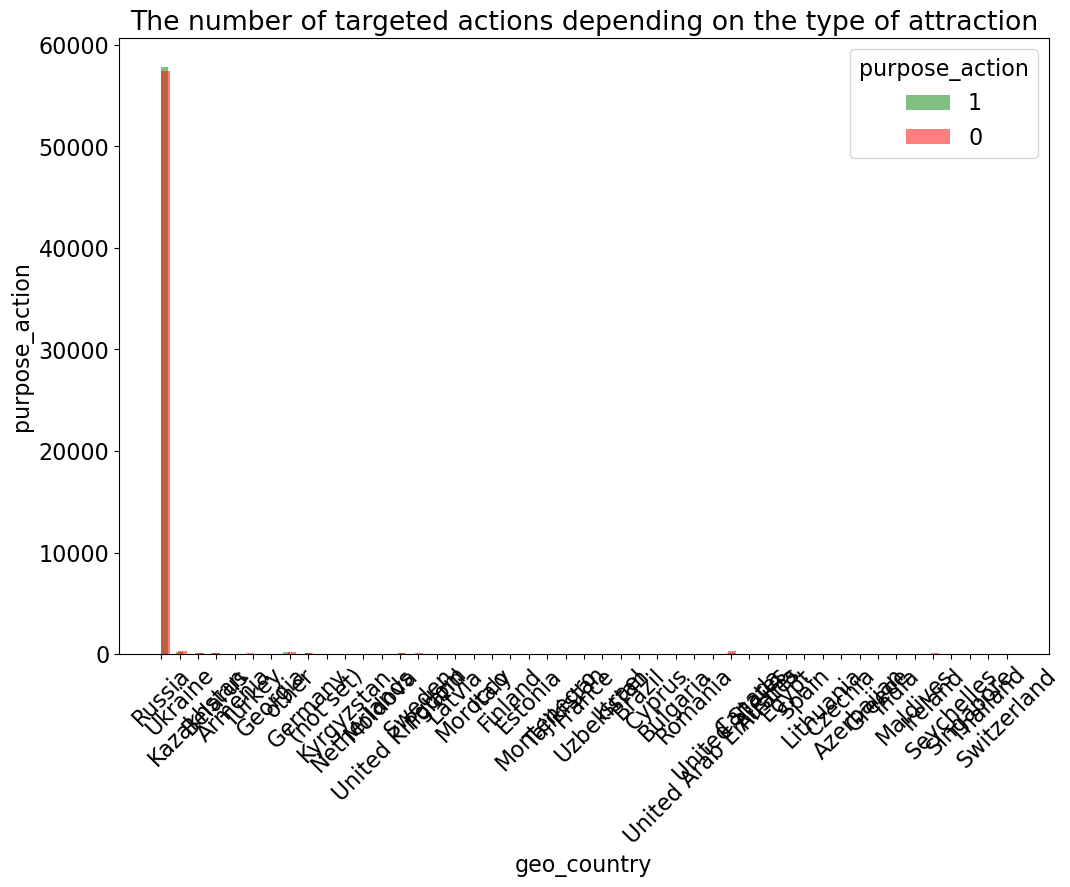

In [171]:
important =[]
not_important = []
new_data = pd.DataFrame()
for i in range(len(months)):

    if months[i] == 5:
        month_clients = list(set(train_data[train_data['month'].isin([months[i]])].client_id.tolist()))
        month_data = train_data[train_data['month'].isin([months[i]])]
        client_data = month_data[month_data['client_id'].isin(month_clients)]
        
       
        for l in range(len(features_important)):
            important_ = client_data[features_important[l]].value_counts().index[:30].tolist()
            n_important_ = list(set(client_data[features_important[l]].tolist())-set(important_))
            important_data = client_data[client_data[features_important[l]].isin(important_)]
            n_important_data = client_data[client_data[features_important[l]].isin(n_important_)]
            n_important_data[features_important[l]]='other'
            client_data_new = pd.concat([n_important_data, important_data])
            client_data_new['client_id']='new'
            client_data =client_data_new
        new_data = pd.concat([new_data, client_data])      
    elif(months[i] > 5):
        month_clients = list((set(train_data[train_data['month'].isin([months[i]])].client_id.tolist()))-
                             (set(train_data[train_data['month'].isin([months[i]-1])].client_id.tolist())))
        old_clients = train_data[train_data['month'].isin([months[i]-1])].client_id.tolist()
        month_data2 = train_data[train_data['month'].isin([months[i]])]
        old_client_data = month_data2[month_data2['client_id'].isin(old_clients)]
        
        month_data = train_data[train_data['month'].isin([months[i]])]
        client_data = month_data[month_data['client_id'].isin(month_clients)]
        for l in range(len(features_important)):
            important_ = client_data[features_important[l]].value_counts().index[:30].tolist()
        #print(important_)
            n_important_ = list(set(client_data[features_important[l]].tolist())-set(important_))
        #print(len(n_important_))
            important_data = client_data[client_data[features_important[l]].isin(important_)]
            n_important_data = client_data[client_data[features_important[l]].isin(n_important_)]
            n_important_data[features_important[l]]='other'
            client_data_new = pd.concat([n_important_data, important_data])
            imp_old= old_client_data[old_client_data[features_important[l]].isin(important_)]
            not_imp_old = old_client_data[old_client_data[features_important[l]].isin(n_important_)]
            not_imp_old[features_important[l]]='other'
            client_data_old_new = pd.concat([imp_old, not_imp_old])
            client_data_old_new['client_id']='old'
            old_client_data = client_data_old_new
            client_data_new['client_id']='new'
            client_data =client_data_new
        data_all = pd.concat([client_data_new, client_data_old_new])
        new_data = pd.concat([new_data, data_all])   

        
shuffled_df = new_data.sample(frac=1,random_state=4)

purpose_df = shuffled_df.loc[shuffled_df['purpose_action'] == 1]

non_purpose_df = shuffled_df.loc[shuffled_df['purpose_action'] == 0].sample(n=len(purpose_df),random_state=42)

month_data_prep2 = pd.concat([purpose_df, non_purpose_df])
    
for i in range(len(features)):
            colors = {1:'green', 0:'red'}
            fig, ax = plt.subplots(figsize=(12, 8))
            for purposes in colors:
                color = colors[purposes]
                data = month_data_prep2[month_data_prep2['purpose_action'] == int(purposes)]

                ax.hist(data[features[i]], bins=100, color=color, alpha= 0.5)

plt.xlabel(features[i])
plt.ylabel('purpose_action')
plt.xticks(rotation = 45)
plt.title('The number of targeted actions depending on the type of attraction')
plt.legend(colors, title='purpose_action')

In [172]:
months=[6, 7, 8, 9, 10, 11, 12]

In [183]:
new_data

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,purpose_action,month
5787035,4538609487970400646.1622243722.1622243722,new,2021-05-29,02:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,KUROllwAYyecYcjFOgAi,XKsYZiUFcdkUXQpoLKyS,mobile,other,other,other,Chrome,other,other,0,5
4084602,2234613009750875676.1621810734.1621810734,new,2021-05-24,01:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,tablet,Android,other,1280x800,Chrome,other,other,0,5
4112785,5948429088383601906.1622445306.1622445306,new,2021-05-31,10:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,aYAcKhelKzYpXrRYknSP,mobile,Android,other,360x800,Chrome,other,other,0,5
5380373,2839645456465643286.1622132509.1622132509,new,2021-05-27,19:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,other,360x640,Chrome,other,other,0,5
5380377,2839645456465643286.1622141091.1622141091,new,2021-05-27,21:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,other,360x640,Chrome,other,other,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10816745,8422178698678992186.1638367007.1638367007,old,2021-12-01,16:56:47,4,kjsLglQLzykiRbcDiGcD,cpc,other,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,Apple,other,Safari,other,other,0,12
10816761,8422178698678992186.1638376448.1638376448,old,2021-12-01,19:34:08,5,kjsLglQLzykiRbcDiGcD,cpc,other,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,Apple,other,Safari,other,other,0,12
10816785,8422178698678992186.1638628986.1638628998,old,2021-12-04,17:43:18,6,bByPQxmDaMXgpHeypKSM,referral,other,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,Apple,other,Safari,other,other,0,12
10816799,8422178698678992186.1638628986.1638628998,old,2021-12-04,17:43:18,6,bByPQxmDaMXgpHeypKSM,referral,other,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,Apple,other,Safari,other,other,1,12


In [173]:
model_data = pd.DataFrame()
for i in range(len(months)):
    month_data = new_data[new_data['month'].isin([months[i]])]
    shuffled_df = month_data.sample(frac=1,random_state=4)

    purpose_df = shuffled_df.loc[shuffled_df['client_id'] == 'old']
    non_purpose_df = shuffled_df.loc[shuffled_df['client_id'] == 'new'].sample(n=len(purpose_df),random_state=42)

    model_data2 = pd.concat([purpose_df, non_purpose_df])
    model_data = pd.concat([model_data, model_data2])



In [174]:
old = new_data[new_data['month'].isin([12])]
only_new = new_data[new_data['month'].isin([5])]
only_old =old[old['client_id'].isin(['old'])]

In [175]:
new_=pd.concat([only_new, only_old])

In [186]:
shuffled_df = new_.sample(frac=1,random_state=4)

purpose_df = shuffled_df.loc[shuffled_df['client_id'] == 'old']

non_purpose_df = shuffled_df.loc[shuffled_df['client_id'] == 'new'].sample(n=len(purpose_df),random_state=42)

model_data_= pd.concat([purpose_df, non_purpose_df])
#making a balance between new and old customers


In [177]:
model_data_total = pd.concat([model_data, model_data_])

In [178]:
shuffled_df = model_data_total.sample(frac=1,random_state=4)

purpose_df = shuffled_df.loc[shuffled_df['purpose_action'] == 1]

non_purpose_df = shuffled_df.loc[shuffled_df['purpose_action'] == 0].sample(n=len(purpose_df),random_state=42)

model_data_balanced = pd.concat([purpose_df, non_purpose_df])


In [179]:
columns_to_drop =model_data_balanced.columns[0:5]
columns_to_drop[0:5]
model_data_balanced_ = model_data_balanced.drop(columns_to_drop, axis=1)

In [180]:
model_data_balanced_.pop('month')

9087550     12
9096399     12
10895879    12
4299181     10
5158423      7
            ..
3055680      6
4774313      5
1037780      5
2730453      7
8071074     12
Name: month, Length: 18538, dtype: int64

In [181]:
model_data_balanced_.to_csv('processed/sberauto_train_data')

In [187]:
model_data_balanced_

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,purpose_action
9087550,BHcvLfOaCWvWTykYqHVe,cpc,other,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,Apple,1920x1080,Chrome,Russia,Moscow,1
9096399,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Samsung,412x915,Chrome,Russia,Izhevsk,1
10895879,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Samsung,412x915,Chrome,Russia,Moscow,1
4299181,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Samsung,412x915,Chrome,Russia,Krasnodar,1
5158423,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x851,Chrome,Russia,Moscow,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3055680,BHcvLfOaCWvWTykYqHVe,cpc,other,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,414x896,Safari,Russia,Moscow,0
4774313,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,393x873,Chrome,Russia,Moscow,0
1037780,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,other,Apple,1920x1080,Chrome,Russia,Moscow,0
2730453,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,iOS,Apple,390x844,Safari,Russia,Grozny,0
